# Histograms

## Introduction
As we saw in the last exercise, summary statistics can sometimes hide unexpected variations in data, so it can be exceptionally valuable to visualize your data in a few ways to ensure you understand it. Histograms are a powerful tool for seeing how different characteristics of your data are distributed across the entire dataset, in a way that can sometimes be hidden in a scatter plot. Consider the methods of visualizing the data below - which you do learn more from?

Text(0, 0.5, 'Counts')

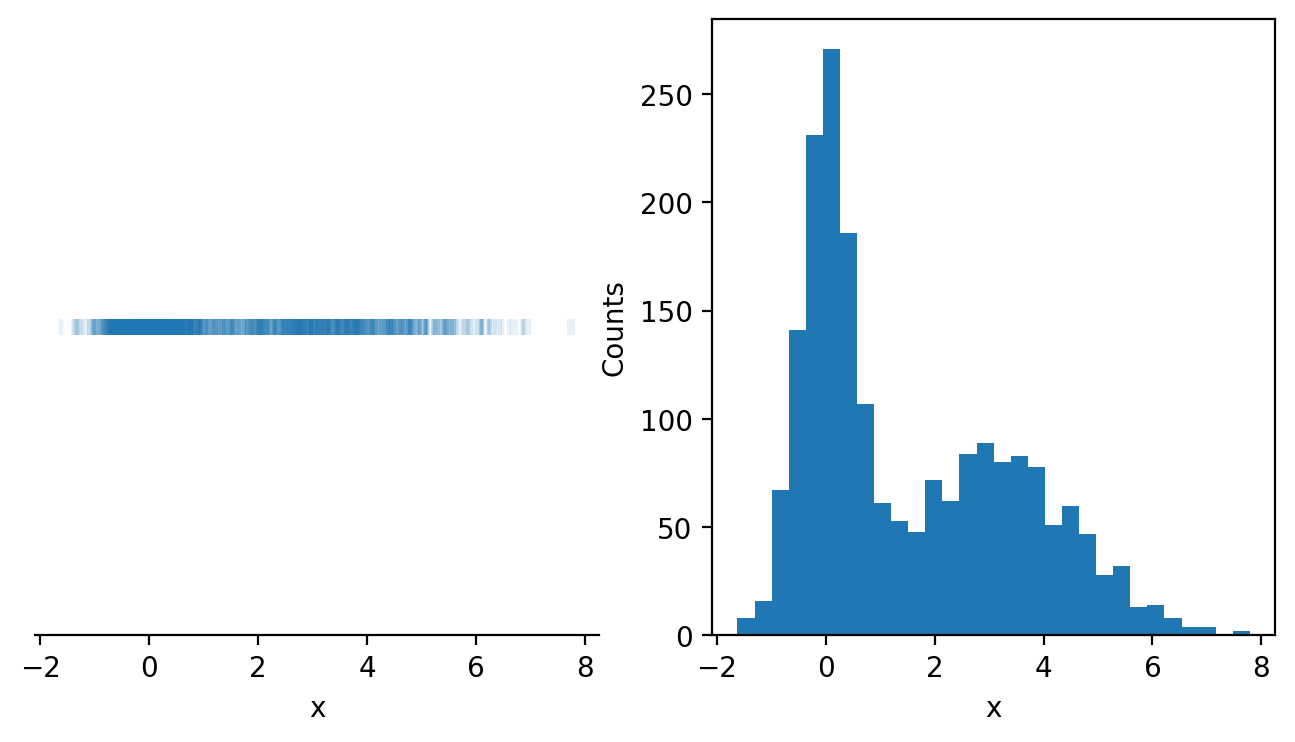

In [74]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(
    42
)  # Ensures the same output each time from the random code code components

# Create some data for visualization
N = 1000
x1_std = 0.5
x2_std = 1.5
x1_mean = 0
x2_mean = 3
x1 = np.random.randn(N) * x1_std + x1_mean
x2 = np.random.randn(N) * x2_std + x2_mean
x_data = np.concatenate([x1, x2])

# Plot the data
fig, (ax_scatter, ax_hist) = plt.subplots(1, 2, figsize=(8, 4))

# Plot the 1-dimensional scatter plot
zeros = np.zeros(x_data.shape)
ax_scatter.scatter(x_data, zeros, marker="|", alpha=0.1)
ax_scatter.set_xlabel("x")
ax_scatter.set_yticks([])  # Turn off the y-ticks since we only have x data
ax_scatter.spines[["right", "top", "left"]].set_visible(
    False
)  # remove the spines except for the bottom one with x labels

# Plot a histogram of the data
ax_hist.hist(x_data, bins=30)
ax_hist.set_xlabel("x")
ax_hist.set_ylabel("Counts")

On the left, we have a 1-dimensional scatter plot of the data, with each point in our dataset presented as a small vertical line. This plots all of the data, but the data overlaps itself making it extremely difficult to read. We even added transparency to the marker with the `alpha` parameter (`alpha=1` means opaque while lower values mean the data are more and more transparent). Even with that adjustment, it's nearly impossible to tell how the data are distributed.

On the right, on the other hand, we have a histogram of our data, which makes it easy to read how the data are distributed. The x-axis once again represents our variable `x`, however, the y-axis represents the frequency of the data appearing in different ranges of data that we call bins. We can see that there is a peak in the frequency of the data around $x=0$ and again around $x=3$.

Histograms can be impactful - consider the example at the start of this course where incidents of cholera deaths were mapped out across London. This was a histogram showing the distribution of deaths along the streets of London in the 1850's leading to a strategy for reducing deaths due to that epidemic.
![Cholera Map](img/snow.png)
*Figure 1. John Snow's 1854 map of the cholera epidemic in London.*

In that case, histograms saved lives.

Let's start by introducing how a histogram is created, then explore how to apply this technique to data.

## Building Histograms

Histograms consist of two components: bins and counts. We create bins for our data and determine how many samples fall into each bin. The corresponding counts of the samples that fall into each bin are then plotted to represent the distribution of the data. The figure below demonstrates how this concept works for a 1-dimensional histogram:

![One dimensional histograms explained](img/5.1-1dhistogram.png)


Let's do this from scratch to get a feel for how it works. Let's say we have the following data:

In [61]:
np.random.seed(42)
x = np.random.rand(10) * 10
x.sort()
x

array([0.58083612, 1.5599452 , 1.5601864 , 3.74540119, 5.98658484,
       6.01115012, 7.08072578, 7.31993942, 8.66176146, 9.50714306])

|   x   |
|-------|
| 0.580 |
| 1.560 | 
| 1.560 |
| 3.745 |
| 5.987 |
| 6.011 |
| 7.081 |
| 7.320 |
| 8.662 |
| 9.507 |

And we want to make a histogram with 5 intervals or "bins": 
- $0 \leq x < 2$
- $2 \leq x < 4$
- $4 \leq x < 6$
- $6 \leq x < 8$
- $8 \leq x < 10$

To do so, we count the number of $x$ values that fall into each bin:

| Bin | Count |
|-----|-------|
| $0 \leq x < 2$ | $3$ |
| $2 \leq x < 4$ | $1$ |
| $4 \leq x < 6$ | $1$ |
| $6 \leq x < 8$ | $3$ |
| $8 \leq x < 10$ | $2$ |

We can similarly do this with code. Let's write a function that takes as input intervals (bins) and data ($x$) and outputs the counts of the values that fall into each bin. *Note: we'll then introduce a few built-in functions for doing that task more efficiently*.

Our inputs will be the array `x` and the edges of the bins:

In [62]:
bin_edges = [0, 2, 4, 6, 8, 10]

First, try writing this function yourself before proceeding.

OK, let's show one implementation of this function:

In [63]:
def histogram(x, bin_edges):
    count = []
    for i in range(len(bin_edges) - 1):
        in_bin = (x > bin_edges[i]) & (x < bin_edges[i + 1])
        count.append(sum(in_bin))
    return count

Let's verify our output matches the example above:

In [64]:
counts = histogram(x, bin_edges)
counts

[3, 1, 1, 3, 2]

We can plot the above data to produce our histogram of $x$ using the above data with a bar plot:

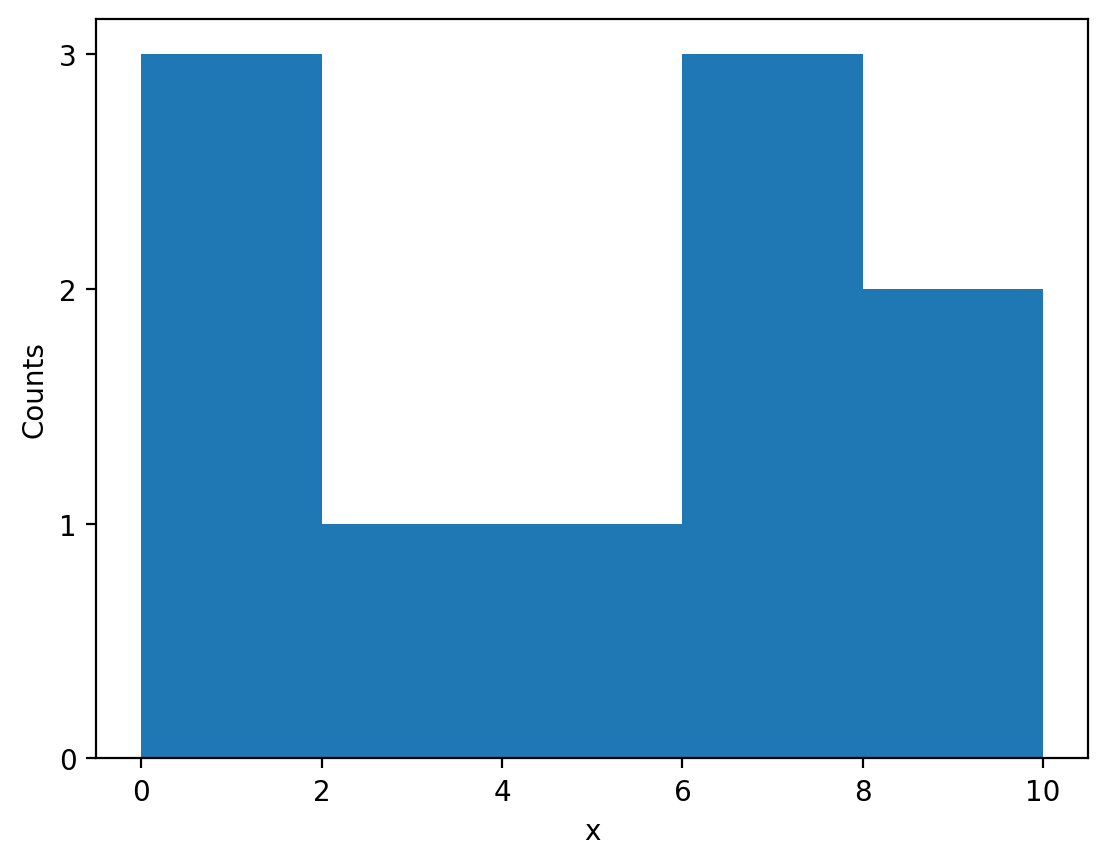

In [71]:
fig, ax = plt.subplots()

bin_width = bin_edges[1] - bin_edges[0]


ax.bar(bin_edges[:-1], counts, width=bin_width, align="edge")

ax.set_xlabel("x")
ax.set_ylabel("Counts")
ax.set_yticks([0, 1, 2, 3])

We can actually do this quite easily using `matplotlib`'s built in `hist` function very simply:

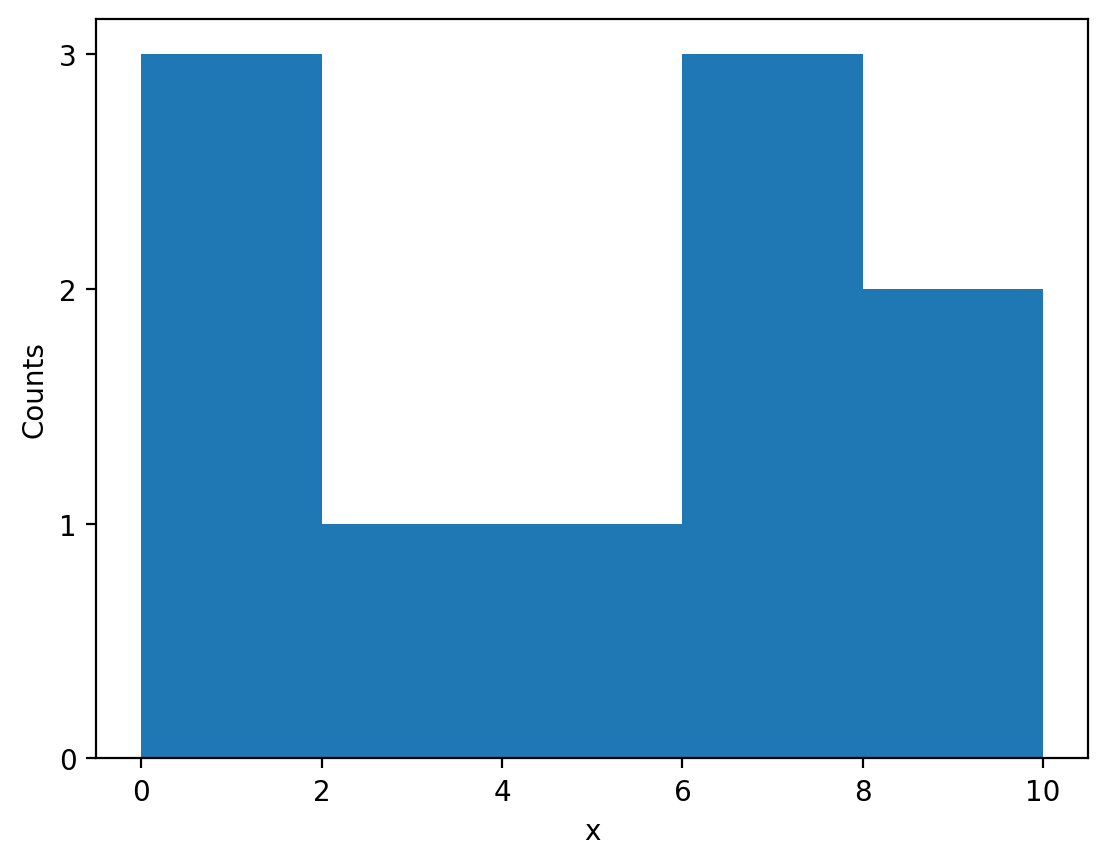

In [73]:
fig, ax = plt.subplots()

ax.hist(x, bins=bin_edges)

ax.set_xlabel("x")
ax.set_ylabel("Counts")
ax.set_yticks([0, 1, 2, 3])

## Considerations when making histograms

Histograms may seem relatively straightforward but care needs to be taken in the choice of the bin sizes. If we set the size to be too small or too large, we risk losing sight of any of the structure in the data.

Let's consider our earlier example data once again and select three different widths of bins for the histograms:

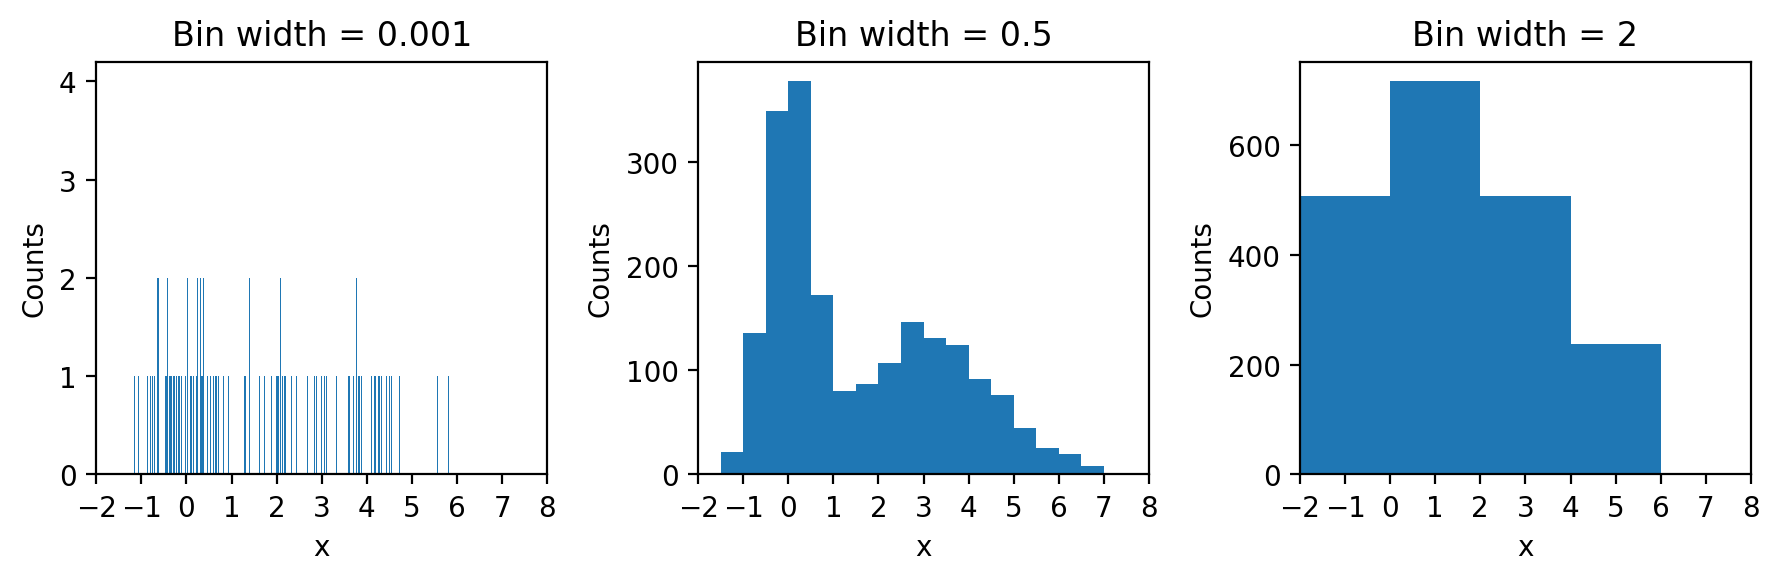

In [87]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

binwidths = [0.001, 0.5, 2]
x_limits = [-2, 8]

for ax, binwidth in zip(axs, binwidths):
    bins = np.arange(x_limits[0], x_limits[1], binwidth)
    ax.hist(x_data, bins=bins)
    ax.set_title(f"Bin width = {binwidth}")
    ax.set_xlabel("x")
    ax.set_ylabel("Counts")
    ax.set_xlim(x_limits)
    ax.set_xticks(np.arange(-2, 9))
plt.tight_layout()

What we can see very clearly here is that the smallest bin width is so small that there are typically no entries or just one in most bins rendering the histogram hardly better than a one-dimensional scatter plot. The largest bin width, conversely groups so much together that we lose sight of the fact that the data has two peaks and not just one.

The bin width is the single most important parameter to adjust on histograms to achieve an effective visual representation of your data.

Now that you're familiar with histograms, let's explore some poker data using these techniques!